<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Student-Info" data-toc-modified-id="Student-Info-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Student Info</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Hypothesis-II" data-toc-modified-id="Hypothesis-II-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Hypothesis II</a></span></li><li><span><a href="#STEP-1:-Load-the-Data-and-determine-Test-Type" data-toc-modified-id="STEP-1:-Load-the-Data-and-determine-Test-Type-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>STEP 1: Load the Data and determine Test Type</a></span><ul class="toc-item"><li><span><a href="#Initialise-Libraries" data-toc-modified-id="Initialise-Libraries-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Initialise Libraries</a></span></li><li><span><a href="#Retrieve-data-from-database" data-toc-modified-id="Retrieve-data-from-database-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Retrieve data from database</a></span><ul class="toc-item"><li><span><a href="#Sample-Group-Design" data-toc-modified-id="Sample-Group-Design-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Sample Group Design</a></span></li></ul></li></ul></li><li><span><a href="#STEP-2:-Validate-Assumptions-chosen-test" data-toc-modified-id="STEP-2:-Validate-Assumptions-chosen-test-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>STEP 2: Validate Assumptions chosen test</a></span><ul class="toc-item"><li><span><a href="#Check-and-Remove-Outliers" data-toc-modified-id="Check-and-Remove-Outliers-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Check and Remove Outliers</a></span></li><li><span><a href="#Test-for-Normality" data-toc-modified-id="Test-for-Normality-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Test for Normality</a></span><ul class="toc-item"><li><span><a href="#Check-group-size" data-toc-modified-id="Check-group-size-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Check group size</a></span></li></ul></li><li><span><a href="#Test-for-Equal-Variance" data-toc-modified-id="Test-for-Equal-Variance-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Test for Equal Variance</a></span></li></ul></li><li><span><a href="#STEP-4:-Interpret-Result-&amp;-Post-Hoc-Tests" data-toc-modified-id="STEP-4:-Interpret-Result-&amp;-Post-Hoc-Tests-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>STEP 4: Interpret Result &amp; Post-Hoc Tests</a></span><ul class="toc-item"><li><span><a href="#Kruskal-Test" data-toc-modified-id="Kruskal-Test-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Kruskal Test</a></span></li><li><span><a href="#Tukey's-Pairwise-Comparison" data-toc-modified-id="Tukey's-Pairwise-Comparison-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Tukey's Pairwise Comparison</a></span></li></ul></li><li><span><a href="#Final-Analysis" data-toc-modified-id="Final-Analysis-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Final Analysis</a></span></li></ul></div>

## Student Info
Name: Susanna Mir
Cohort: DS-PT
Instructor: James Irving

********************************

## Introduction

The goal of the project is to query the Northwind database to query the data needed to perform a statistical analysis. In this statistical analysis, a hypothesis test will be perfomed to answer the following question:

> Does the order month have a significant effect on the total spent on orders for that  month?

In addition to answering this question with a hypothesis, I have added 3 other hypotheses to test:
- Hypothesis I  :  Does discount have a significant effect on quantity bought on an order?
- Hypothesis II :  Does discount have a significant effect on total spent on an order?
- Hypothesis IV :  Does the order month have a significant effect on the quantity on orders for that month?


********************************

## Hypothesis II

>Does the order month have a statistically significant effect on the total spent ($) on a products for the month? If so, which month(s)?

- $H_1$: The order month DOES have a statistically significant effect on the total spent for the month.  
- $H_0$: The order month DOES NOT have a statistically significant effect on the total spent for the month.  


Set the P-Value
$\alpha$=0.05
If the P-Value is < 0.5 we can be confident that we can reject the null hypothesis

- $H_1$: What does it mean to be significant?  (P-Value< 0.5)
An observed difference between the two groups is probably not due to chance

- $H_0$: What does it mean to NOT be significant?  (P-Value> 0.5)
There is not enough evidence to say that an observed difference between the two groups is not random.  (If there is a difference, it is smaller than we care about)


********************************

## STEP 1: Load the Data and determine Test Type

### Initialise Libraries

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import scipy.stats as stat
from scipy import stats

#data visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

#for t-tests
from scipy.stats import ttest_ind

#for ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

from scipy.stats import f_oneway

#for Project Library Functions
from functions import Cohen_d, find_outliers_IQR,find_outliers_Z
## Uncomment the line below to see the source code for the imported functions
# fs.ihelp(Cohen_d,False),fs.ihelp(find_outliers_IQR,False), fs.ihelp(find_outliers_Z,False)

### Retrieve data from database

The schema below defines the tables and relationships for the database. The Order_Details table contains information with the columns of interest: [Quantity] [UnitPrice] and [Order_ID].  The Order table has the columns of interest OrderDate.

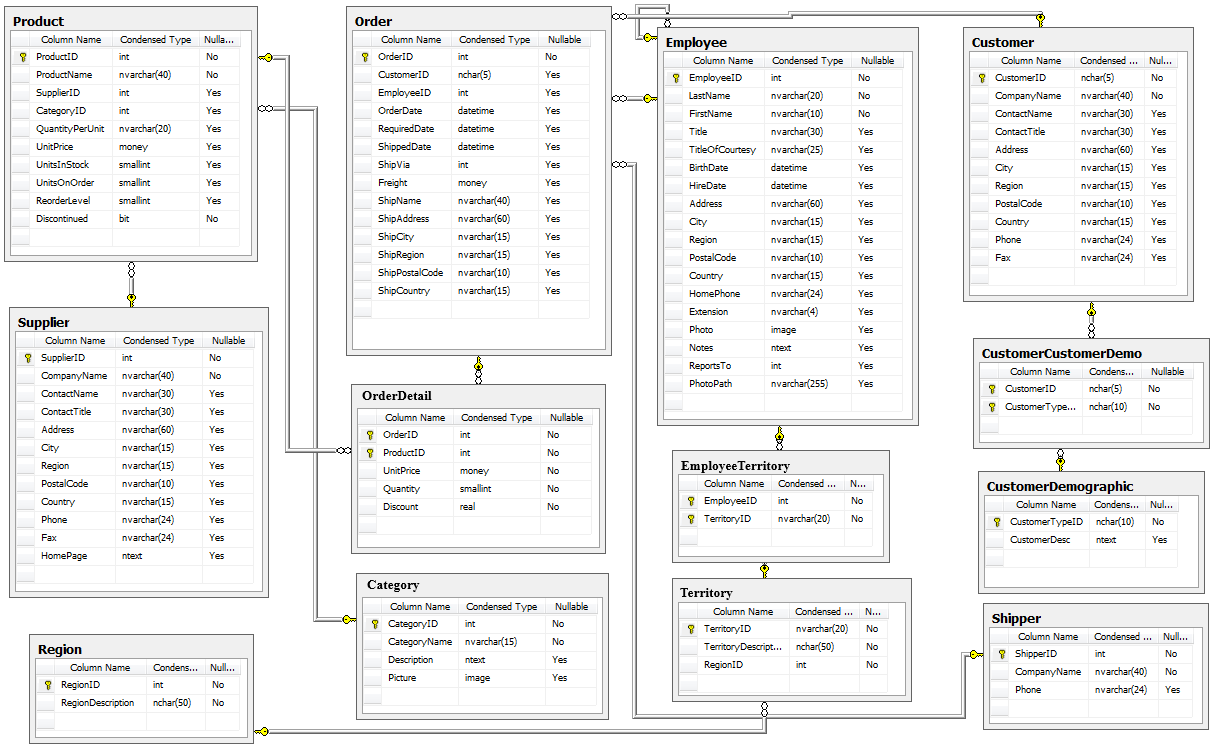

In [2]:
from IPython.display import Image
Image("Northwind_ERD.png")

In [3]:
# create a connection to the database
connect = sqlite3.connect('Northwind_small.sqlite')
cur = connect.cursor()

In [4]:
# view table definition
cur.execute("""SELECT name FROM sqlite_master WHERE type='table';""")
df_tables = pd.DataFrame(cur.fetchall(), columns=['Table'])
df_tables

,Table
0,Employee
1,Category
2,Customer
3,Shipper
4,Supplier
5,Order
6,Product
7,OrderDetail
8,CustomerCustomerDemo
9,CustomerDemographic


In [5]:
# query the database
cur.execute('''
     SELECT od.OrderID, od.UnitPrice, od.Quantity, o.OrderDate 
     FROM OrderDetail od, `Order` o
     WHERE o.Id = od.OrderID;
     ''')

# store results in a dataframe
df_order_details = pd.DataFrame(cur.fetchall())
df_order_details.columns = [i[0] for i in cur.description]

# check the import
df_order_details.head()

,OrderId,UnitPrice,Quantity,OrderDate
0,10248,14.0,12,2012-07-04
1,10248,9.8,10,2012-07-04
2,10248,34.8,5,2012-07-04
3,10249,18.6,9,2012-07-05
4,10249,42.4,40,2012-07-05


In [6]:
df_order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 4 columns):
OrderId      2155 non-null int64
UnitPrice    2155 non-null float64
Quantity     2155 non-null int64
OrderDate    2155 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 67.4+ KB


In [7]:
## Data Clean check - are there any null values?

In [8]:
# query the database
cur.execute("SELECT * FROM OrderDetail;")

# store results in a dataframe
df_order_details_check_nulls = pd.DataFrame(cur.fetchall())

In [9]:
# query the database to find for non-technical presentation the orderdates of the data
cur.execute('''
     SELECT distinct(o.ShipCountry)
     FROM `Order` o;
     ''')

# store results in a dataframe
df_order_date_summary_check = pd.DataFrame(cur.fetchall())

In [10]:
df_order_date_summary_check.head()

,0
0,France
1,Germany
2,Brazil
3,Belgium
4,Switzerland


In [11]:
df_order_details_check_nulls.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [12]:
# no null values found

#### Sample Group Design

>What type of data do I have (Numeric or categorical?)
> Numerical (Total Spent) + Categorical (Order Month)

>How many samples/groups am I comparing? = 	
> Order Month is more than 1 sample so choose a multi-sample t-test.

In [13]:
df_order_details['order_month'] = df_order_details['OrderDate'].str[5:7]
df_order_details['order_month'] = df_order_details['order_month'].map({'01':'January', '02':'February',
                                '03':'March', '04':'April', '05':'May', '06':'June', '07':'July',
                                '08':'August', '09':'September', '10':'October', '11':'November', '12':'December'})
df_order_details


,OrderId,UnitPrice,Quantity,OrderDate,order_month
0,10248,14.00,12,2012-07-04,July
1,10248,9.80,10,2012-07-04,July
2,10248,34.80,5,2012-07-04,July
3,10249,18.60,9,2012-07-05,July
4,10249,42.40,40,2012-07-05,July
5,10250,7.70,10,2012-07-08,July
6,10250,42.40,35,2012-07-08,July
7,10250,16.80,15,2012-07-08,July
8,10251,16.80,6,2012-07-08,July
9,10251,15.60,15,2012-07-08,July


In [14]:
## Create TotalSpent column
df_order_details['Total Spent'] = df_order_details['UnitPrice'] * df_order_details['Quantity']
df_order_details

,OrderId,UnitPrice,Quantity,OrderDate,order_month,Total Spent
0,10248,14.00,12,2012-07-04,July,168.00
1,10248,9.80,10,2012-07-04,July,98.00
2,10248,34.80,5,2012-07-04,July,174.00
3,10249,18.60,9,2012-07-05,July,167.40
4,10249,42.40,40,2012-07-05,July,1696.00
5,10250,7.70,10,2012-07-08,July,77.00
6,10250,42.40,35,2012-07-08,July,1484.00
7,10250,16.80,15,2012-07-08,July,252.00
8,10251,16.80,6,2012-07-08,July,100.80
9,10251,15.60,15,2012-07-08,July,234.00


/Users/SusannaVSyassen/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0, 'July'),
 Text(0, 0, 'August'),
 Text(0, 0, 'September'),
 Text(0, 0, 'October'),
 Text(0, 0, 'November'),
 Text(0, 0, 'December'),
 Text(0, 0, 'January'),
 Text(0, 0, 'February'),
 Text(0, 0, 'March'),
 Text(0, 0, 'April'),
 Text(0, 0, 'May'),
 Text(0, 0, 'June')]

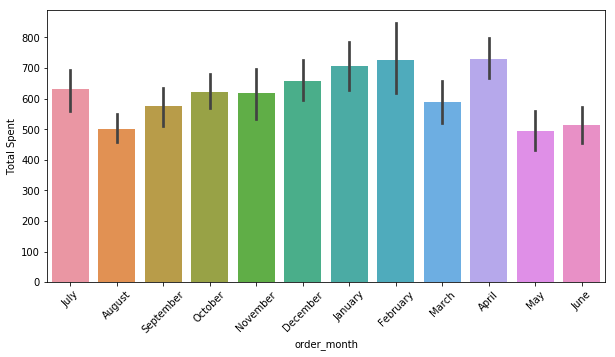

In [15]:
plt.figure(figsize=(10,5))
chart = sns.barplot(data=df_order_details, x='order_month',y='Total Spent',ci=68,)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [16]:
grps = {}
for grp_name in df_order_details['order_month'].unique():
    grps[grp_name] = df_order_details.groupby('order_month').get_group(grp_name)['Total Spent']
    
grps

{'July': 0       168.0
 1        98.0
 2       174.0
 3       167.4
 4      1696.0
 5        77.0
 6      1484.0
 7       252.0
 8       100.8
 9       234.0
 10      336.0
 11     2592.0
 12       50.0
 13     1088.0
 14      200.0
 15      604.8
 16      640.0
 17       54.0
 18      403.2
 19      168.0
 20      304.0
 21      486.5
 22      380.0
 23     1320.0
 24      393.0
 25      124.8
 26      877.5
 27       86.4
 28      156.0
 29      760.0
         ...  
 946     493.0
 947    1350.0
 948    3900.0
 949      35.0
 950     772.8
 951     417.6
 952    1064.0
 953      54.0
 954     310.0
 955      60.0
 956     399.0
 957     108.0
 958     190.0
 959     510.0
 960    2170.0
 961    1045.0
 962     360.0
 963    1360.0
 964    1440.0
 965      48.0
 966     310.0
 967     294.0
 968      80.0
 969      90.0
 970     120.0
 971    3952.5
 972     532.0
 973     225.0
 974     322.5
 975    1650.0
 Name: Total Spent, Length: 136, dtype: float64, 'August': 59       456.00
 6

/Users/SusannaVSyassen/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


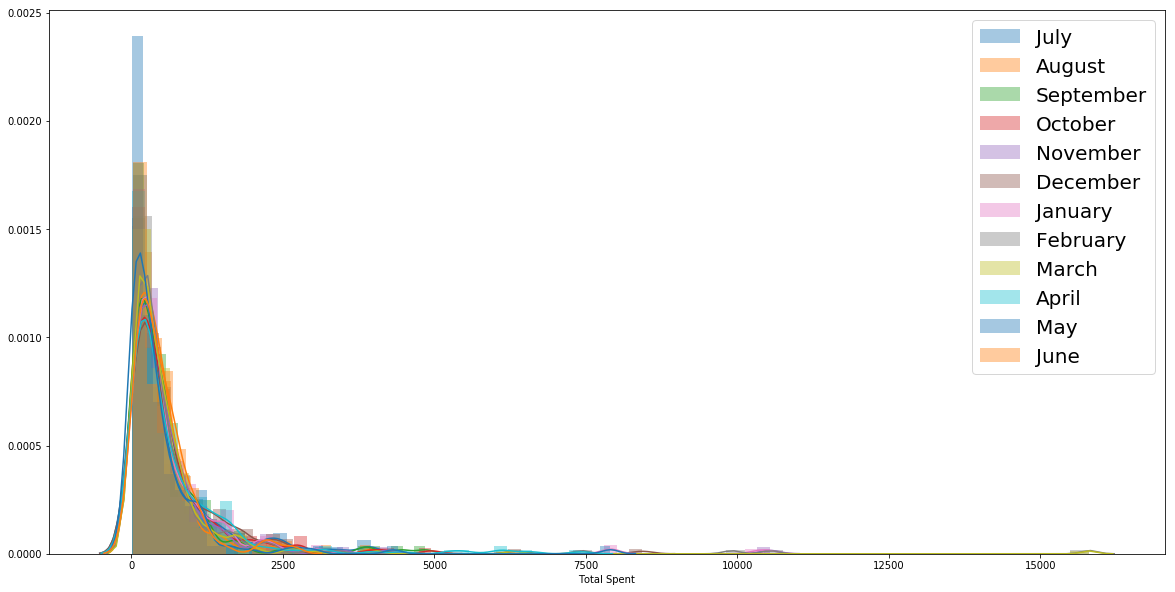

In [17]:
plt.figure(figsize=(20, 10))
[sns.distplot(v,label=k) for k,v in grps.items()]
plt.legend()
plt.legend(fontsize=20);

********************************

## STEP 2: Validate Assumptions chosen test

For the Independent 2 Sample T-Test the assumptions are:

- There exists NO significant outliers
- Normality is true
- Equal Variance is true

### Check and Remove Outliers

Use absolutely value of Z-scores >3 as rule to find and remove outliers

In [18]:
from functions import find_outliers_Z

In [19]:
for grp_name,grp_data in grps.items():
    idx_outs = find_outliers_Z(grp_data)
    print(f"[i] Found {idx_outs.sum()} outliers using Z-score method for {grp_name}.")
    grps[grp_name] = grp_data[~idx_outs]

[i] Found 4 outliers using Z-score method for July.
[i] Found 4 outliers using Z-score method for August.
[i] Found 4 outliers using Z-score method for September.
[i] Found 3 outliers using Z-score method for October.
[i] Found 2 outliers using Z-score method for November.
[i] Found 2 outliers using Z-score method for December.
[i] Found 4 outliers using Z-score method for January.
[i] Found 4 outliers using Z-score method for February.
[i] Found 3 outliers using Z-score method for March.
[i] Found 8 outliers using Z-score method for April.
[i] Found 2 outliers using Z-score method for May.
[i] Found 3 outliers using Z-score method for June.


/Users/SusannaVSyassen/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


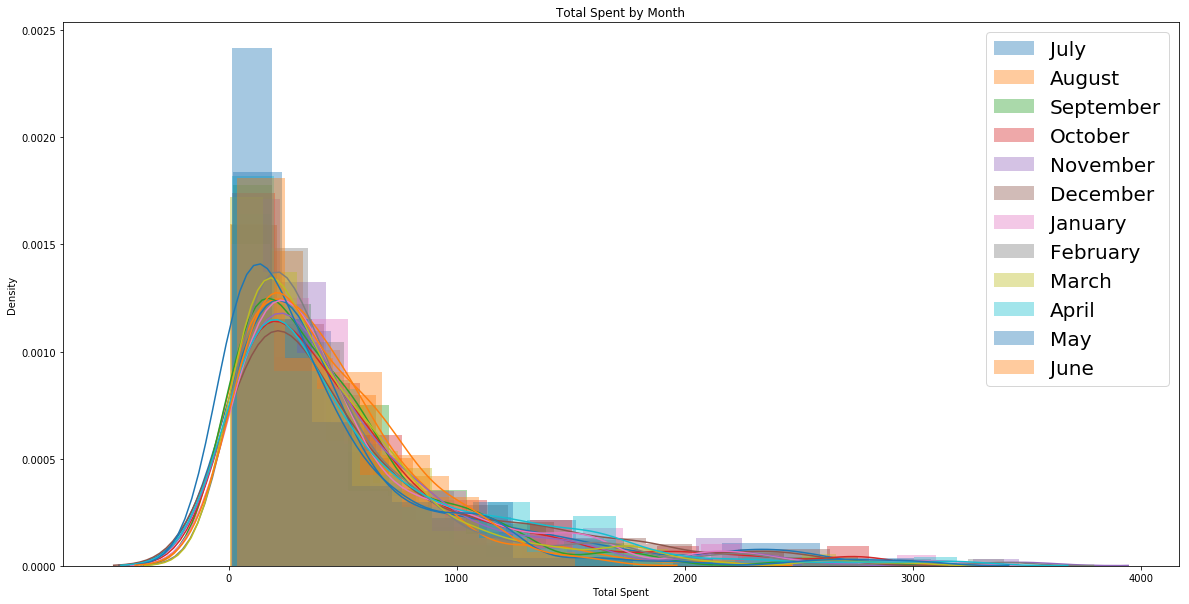

In [20]:
plt.figure(figsize=(20, 10))
[sns.distplot(v,label=k) for k,v in grps.items()]
ax = plt.gca()
ax.legend()
ax.set(title='Total Spent by Month',
ylabel='Density')
plt.legend(fontsize=20);

### Test for Normality

Test Assumption of Normality using D'Agostino-Pearson's normality test scipy.stats.normaltest


In [21]:
for k,v in grps.items():
    stat,p = stats.normaltest(v)
    print(f"Group {k} Normaltest p-value={round(p,4)}")
    sig = 'is NOT' if p<.05 else 'IS'

    print(f"\t-The data {sig} normal.")

Group July Normaltest p-value=0.0
	-The data is NOT normal.
Group August Normaltest p-value=0.0
	-The data is NOT normal.
Group September Normaltest p-value=0.0
	-The data is NOT normal.
Group October Normaltest p-value=0.0
	-The data is NOT normal.
Group November Normaltest p-value=0.0
	-The data is NOT normal.
Group December Normaltest p-value=0.0
	-The data is NOT normal.
Group January Normaltest p-value=0.0
	-The data is NOT normal.
Group February Normaltest p-value=0.0
	-The data is NOT normal.
Group March Normaltest p-value=0.0
	-The data is NOT normal.
Group April Normaltest p-value=0.0
	-The data is NOT normal.
Group May Normaltest p-value=0.0
	-The data is NOT normal.
Group June Normaltest p-value=0.0025
	-The data is NOT normal.


If there is normal data move onto assumption testing assumption for equal variance.
The data is NOT normal, Check if your group sizes (n) are big enough to safely ignore normality assumption? (see size definitions below)

Parametric Test	Sample size guidelines for nonnormal data
- 1-sample t test	Greater than 20
- 2-sample t test	Each group should be greater than 15   
- One-Way ANOVA	If have 2-9 groups, each group n >= 15
  If have 10-12 groups, each group n>20.

If the group N's are NOT large enough:
Move onto selecting the non-parametric version of the t-test

#### Check group size

In [22]:
for grp_name,grp_data in grps.items():
    print(f"Total size n for {grp_name} is {len(grps[grp_name])}")

Total size n for July is 132
Total size n for August is 149
Total size n for September is 148
Total size n for October is 176
Total size n for November is 153
Total size n for December is 193
Total size n for January is 233
Total size n for February is 197
Total size n for March is 252
Total size n for April is 253
Total size n for May is 153
Total size n for June is 73


>Group size is large enough (>15) to safely ignore normality assumption to continue for Anova.

### Test for Equal Variance

>Data is large enough, move onto testing for equal variance.

Traditional t-tests assume that sample sizes and sample variances between the two groups are equal. 

- If it fails the assumption of equal variance: Use a Kruskal Test
- If it passes the assumption of equal variance: Use a ANOVA Test

In [23]:
data=[]
for k,v in grps.items():

    data.append(v.values)

In [24]:
stat,p = stats.levene(*data)
print(f"Levene' Test for Equal Variance p-value={round(p,4)}")
sig = 'do NOT' if p<.05 else 'DO'

print(f"\t-The groups {sig} have equal variance.")

Levene' Test for Equal Variance p-value=0.034
	-The groups do NOT have equal variance.


If the resulting p-value of Levene's test is less than the p-value 0.05, the obtained differences in 
sample variances are unlikely to have occurred based on random sampling from a 
population with equal variances.

>Equal Variance DID NOT PASS, run Kruskal Test.

********************************

## STEP 4: Interpret Result & Post-Hoc Tests

If the P-Value is < $\alpha$:  
- Reject the null hypothesis

If the P-Value <$\alpha$ AND you have multiple groups: 
- Run ANOVA Test OR Kruskal depending on equal variance results.
- Run a pairwise Tukey's test to know which groups were significantly different
- Report statistical power (optional)
- Calculate the effect size between the months for particular months that showed True results in the
Tukey's test (e.g. Cohen's $d$)

Post-Hoc Tests/Calculations:
- Tukey's Pairwise Comparisons	statsmodels.stats.multicomp.pairwise_tukeyhsd
-  Effect Size:	Cohens_d
- Statistical Power	statsmodels.stats.power: TTestIndPower , TTestPower

### Kruskal Test

In [25]:
stat,p = stats.kruskal(*data)
print(f"Kruskal' Test p-value={round(p,4)}")
sig = 'IS' if p<.05 else 'IS NOT'

print(f"\t-The p-value {sig} significant.")

Kruskal' Test p-value=0.0954
	-The p-value IS NOT significant.


In [26]:
>Run ANOVA as we passed the assumption of normality and not equal variance

SyntaxError: invalid syntax (<ipython-input-26-befee778cf08>, line 1)

In [ ]:
stat,p = stats.f_oneway(*data)
print(f"ANOVA' Test p-value={round(p,4)}")
sig = 'IS' if p<.05 else 'IS NOT'

print(f"\t-The p-value {sig} significant.")

>Even though Kruskal did not show signs, ANOVA did, run Tukey's test to see which sample groups are more >significant.  ANOVA (Analysis of Variance) is a method for generalizing statistical tests to multiple >groups.

>There is a significant difference between the groups of discounts, but
>Anova does not specify which ones.  Run Tukey's comparison to further discover the difference
>between each month value.


>As Kruskow shows < p then follow up with tukey and reject the null hypothesis.

### Tukey's Pairwise Comparison

In [ ]:
# del prep_data_for_tukeys
from functions import prep_data_for_tukeys

In [ ]:
df_tukey = prep_data_for_tukeys(grps)
df_tukey

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukeys = pairwise_tukeyhsd(df_tukey['data'],df_tukey['group'])
tukeys.summary()

In [ ]:
mc = MultiComparison(df_order_details['Total Spent'], df_order_details['order_month'])
mc_tukey_results = mc.tukeyhsd()
print(mc_tukey_results)

mc_tukey_results = mc_tukey_results.plot_simultaneous(figsize=(16,14))
plt.show()

********************************

## Final Analysis

>The Tukeys test agrees with Kruskal test. We can reject the null hypothesis as the p-value was <0.5.

>As seen from the Tukey's T-Test no month had a statistically significant 
e>ffect on the Total Spent of products ordered.
